`pidgin` is a collection of IPython magics for creating computable essays.

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/deathbeds/pidgin/master?filepath=readme.ipynb)

In [1]:
    if __name__ == '__main__': 
        %load_ext pidgin

# Markdown Mode

In [2]:
    %pidgin markdown 

In [3]:
---
With `pidgin.markdown`, code cells accept markdown.  Any indented code blocks are executed.

    foo = 42
    print(f"foo is {foo}")

> Accepting the `pidgin.markdown` convetion means the author agrees to indent all their code at least once; and sometimes more in nested lists. 

---

---
With `pidgin.markdown`, code cells accept markdown.  Any indented code blocks are executed.

    foo = 42
    print(f"foo is {foo}")

> Accepting the `pidgin.markdown` convetion means the author agrees to indent all their code at least once; and sometimes more in nested lists. 

---

foo is 42


# Template Mode

With templates real data can be inserted into the computational essay. An author should desire their notebook restart and run all during template mode.

In [4]:
    
    %pidgin template
Skipping the first line suppresses the markdown output.

In [5]:
---
In template mode, `jinja2` may be invoked to template markdown and code.  We already know that `foo` is 42, but can test that assertion with

    assert foo is {{foo}} is 42
    {% for i in range(3) %}print({{i}})
    {% endfor %}
---

---
In template mode, `jinja2` may be invoked to template markdown and code.  We already know that `foo` is 42, but can test that assertion with

    assert foo is 42 is 42
    print(0)
    print(1)
    print(2)
    
---

0
1
2


In [6]:
# Turning off magics

    %pidgin --off template markdown

# Turning off magics

    %pidgin --off template markdown

## Yaml

Start code with `---`

In [7]:
    %pidgin conventions

In [8]:
    ---
    a: 42

In [9]:
    assert a == 42

## Graphviz

Start code with `graph` or `digraph`

    !conda install -y graphviz

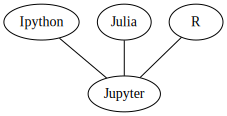

In [10]:
    graph { {Ipython Julia R}--Jupyter}

# Notebooks as source

pidgin uses notebooks as source; line numbers are retained so that the notebook source produces semi-sane tracebacks.

In [11]:
    from pidgin import markdown, template, conventions

The pidgin loader allows an author to import notebooks directly as source.  This means all of the pidgin documents are importable.

In [12]:
    %%pidgin markdown template conventions
    import readme

import readme

In [13]:
    assert all(file.__file__.endswith('.ipynb') for file in (markdown, template, conventions))

#### Everything Should Compute

Convert a document into other formats; Restart, Run All, `nbconvert`.

In [14]:
%%pidgin markdown template
Use pidgin a cell magic to temporarily employ any convetions.
    
    if __name__ == '__main__':
        !jupyter nbconvert --to markdown readme.ipynb

Use pidgin a cell magic to temporarily employ any convetions.
    
    if __name__ == '__main__':
        !jupyter nbconvert --to markdown readme.ipynb

[NbConvertApp] Converting notebook readme.ipynb to markdown
[NbConvertApp] Writing 3095 bytes to readme.md
